<a href="https://colab.research.google.com/github/MrYousri97/Spark-Intern/blob/main/Task%203/EDA_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA-Retail

**Grip Internship Program**

**Task 3**

**Author Mahmoud Yousri**

## Import Libraries

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns
%matplotlib inline

## Reading Data

In [2]:
data= pd.read_csv('/content/SampleSuperstore.csv')

# Describe Data

In [3]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
data['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [7]:
for i in data:
  print('Column Name:', i , 'Consists of \n:' , data[i].unique())
  print('-------------------------------------------------')

Column Name: Ship Mode Consists of 
: ['Second Class' 'Standard Class' 'First Class' 'Same Day']
-------------------------------------------------
Column Name: Segment Consists of 
: ['Consumer' 'Corporate' 'Home Office']
-------------------------------------------------
Column Name: Country Consists of 
: ['United States']
-------------------------------------------------
Column Name: City Consists of 
: ['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' '

In [8]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
for i in data:
  print('Column Name:', i , 'Consists of :\n', data[i].value_counts())
  print('-------------------------------------------------')

Column Name: Ship Mode Consists of :
 Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64
-------------------------------------------------
Column Name: Segment Consists of :
 Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64
-------------------------------------------------
Column Name: Country Consists of :
 United States    9994
Name: Country, dtype: int64
-------------------------------------------------
Column Name: City Consists of :
 New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64
-------------------------------------------------
Column Name: State Consists of :
 California              2001
New York                1128
Texas         

Sales For Each Region

In [10]:
Sales_Region=data.groupby('Region')['Sales'].agg(['count','mean','min','max','sum'])
print(Sales_Region)

         count        mean    min        max          sum
Region                                                   
Central   2323  215.772661  0.444  17499.950  501239.8908
East      2848  238.336110  0.852  11199.968  678781.2400
South     1620  241.803645  1.167  22638.480  391721.9050
West      3203  226.493233  0.990  13999.960  725457.8245


In [11]:
data[data['Sub-Category']=='Bookcases']

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
38,Standard Class,Home Office,United States,Houston,Texas,77041,Central,Furniture,Bookcases,532.3992,3,0.32,-46.9764
189,First Class,Home Office,United States,New York City,New York,10035,East,Furniture,Bookcases,899.1360,4,0.20,112.3920
192,First Class,Home Office,United States,New York City,New York,10035,East,Furniture,Bookcases,626.3520,3,0.20,46.9764
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9741,Standard Class,Corporate,United States,Burlington,Vermont,5408,East,Furniture,Bookcases,4404.9000,5,0.00,1013.1270
9769,Standard Class,Home Office,United States,Hialeah,Florida,33012,South,Furniture,Bookcases,339.9200,5,0.20,8.4980
9787,Standard Class,Consumer,United States,Houston,Texas,77070,Central,Furniture,Bookcases,1023.3320,5,0.32,-30.0980
9931,Standard Class,Consumer,United States,San Bernardino,California,92404,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960


Average Sales for each category for each region

In [26]:
data.groupby(['Region','Category'])['Sales'].mean()

Region   Category       
Central  Furniture          340.534644
         Office Supplies    117.458801
         Technology         405.753124
East     Furniture          346.574383
         Office Supplies    120.044425
         Technology         495.278469
South    Furniture          353.309289
         Office Supplies    126.282727
         Technology         507.753952
West     Furniture          357.302325
         Office Supplies    116.422377
         Technology         420.687533
Name: Sales, dtype: float64

let's see which ship mode of sale is the most

In [13]:
data.groupby('Ship Mode')['Sales'].agg(['count','sum'])

,count,sum
Ship Mode,,
First Class,1538,3.514284e+05
Same Day,543,1.283631e+05
Second Class,1945,4.591936e+05
Standard Class,5968,1.358216e+06


Top 10 Sales

In [14]:
data.sort_values(by=['Sales'],ascending = False).head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2697,Standard Class,Home Office,United States,Jacksonville,Florida,32216,South,Technology,Machines,22638.480,6,0.5,-1811.0784
6826,Standard Class,Corporate,United States,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.950,5,0.0,8399.9760
8153,First Class,Consumer,United States,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808
2623,First Class,Home Office,United States,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888
4190,Standard Class,Consumer,United States,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856
9039,Standard Class,Consumer,United States,Detroit,Michigan,48205,Central,Office Supplies,Binders,9892.740,13,0.0,4946.3700
4098,Standard Class,Consumer,United States,Minneapolis,Minnesota,55407,Central,Office Supplies,Binders,9449.950,5,0.0,4630.4755
4277,Standard Class,Corporate,United States,Lakewood,New Jersey,8701,East,Technology,Machines,9099.930,7,0.0,2365.9818
8488,Second Class,Consumer,United States,Arlington,Virginia,22204,South,Technology,Machines,8749.950,5,0.0,2799.9840
6425,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19120,East,Technology,Copiers,8399.976,4,0.4,1119.9968


## Let's Visualize 

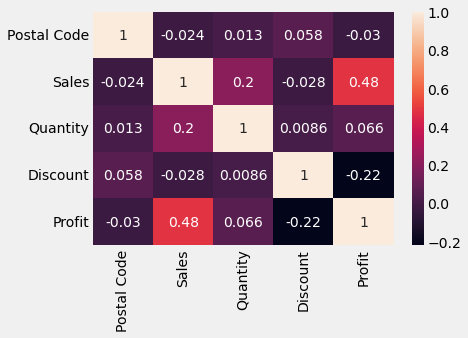

In [28]:
plt.xticks(rotation=90)
sns.heatmap(data.corr(),annot=True)
plt.show()

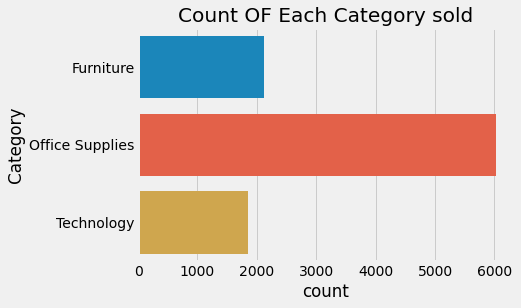

In [22]:
plt.style.use('fivethirtyeight')
plt.xticks(rotation=0)
sns.countplot(data = data , y='Category')
plt.title("Count OF Each Category sold")
plt.show()

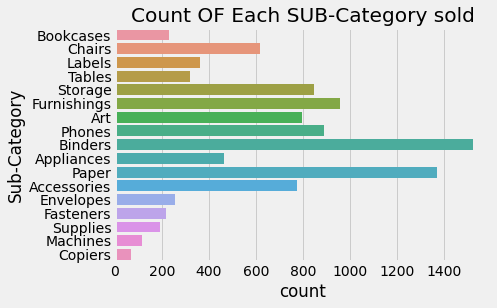

In [23]:
plt.xticks(rotation=0)
sns.countplot(data = data , y='Sub-Category')
plt.title("Count OF Each SUB-Category sold")
plt.show()

Count for Ship Mode

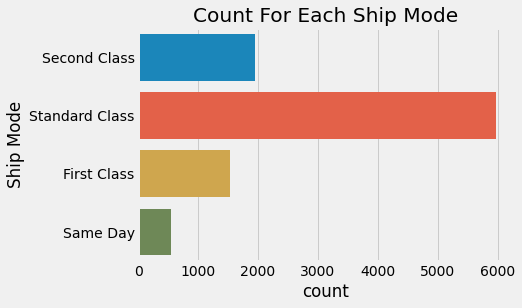

In [21]:
plt.xticks(rotation=0)
sns.countplot(data = data , y='Ship Mode')
plt.title("Count For Each Ship Mode")
plt.show()

Count for Segment

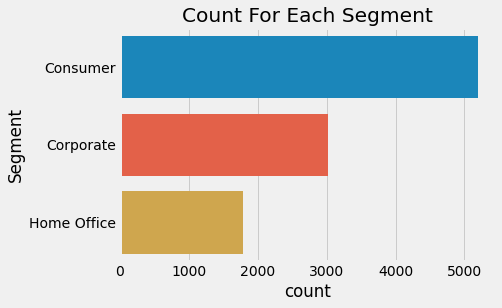

In [24]:
plt.xticks(rotation=0)
sns.countplot(data = data , y='Segment')
plt.title("Count For Each Segment")
plt.show()

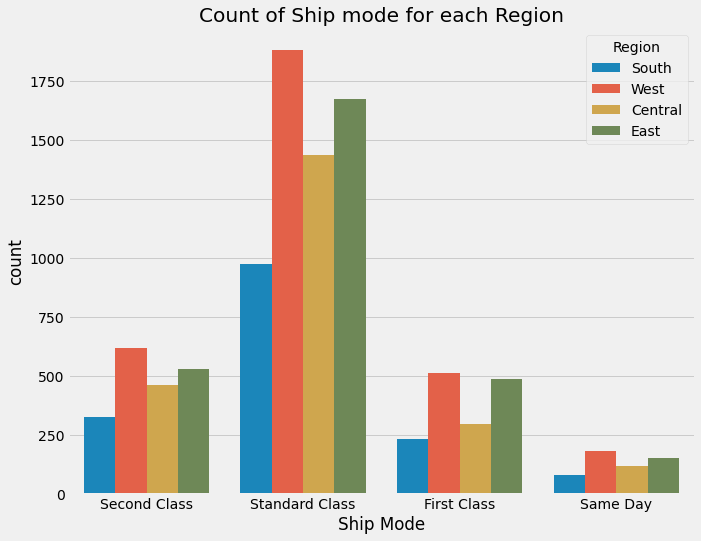

In [19]:
plt.figure(figsize=(10,8))
sns.countplot(data = data ,x= "Ship Mode" , hue = "Region")
plt.title('Count of Ship mode for each Region')
plt.show()

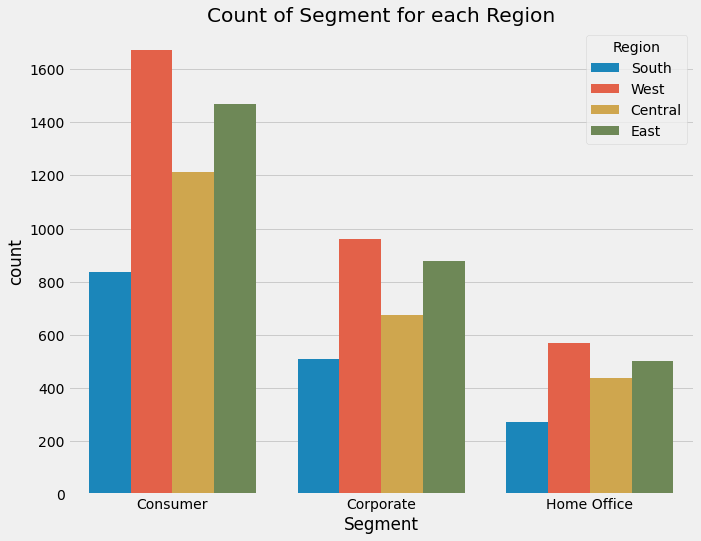

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(data = data ,x= "Segment" , hue = "Region")
plt.title('Count of Segment for each Region')
plt.show()

All Sales For each Region

In [38]:
SalesForRegion = data.groupby(['Region'],as_index=False).sum()

In [39]:
SalesForRegion

,Region,Postal Code,Sales,Quantity,Discount,Profit
0,Central,151786150,501239.8908,8780,558.34,39706.3625
1,East,50171698,678781.2400,10618,414.00,91522.7800
2,South,55875052,391721.9050,6209,238.55,46749.4303
3,West,293739752,725457.8245,12266,350.20,108418.4489


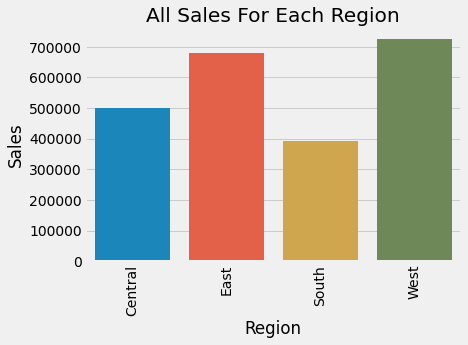

In [48]:
plt.xticks(rotation=90)
sns.barplot(data = SalesForRegion , x = "Region" ,y = "Sales")
plt.title("All Sales For Each Region")
plt.show()

All Sales For each State

In [49]:
SalesForState = data.groupby(['State'],as_index=False).sum()

In [50]:
SalesForState

,State,Postal Code,Sales,Quantity,Discount,Profit
0,Alabama,2195669,19510.6400,256,0.00,5786.8253
1,Arizona,19102126,35282.0010,862,68.00,-3427.9246
2,Arkansas,4339309,11678.1300,240,0.00,4008.6871
3,California,184382639,457687.6315,7667,145.60,76381.3871
4,Colorado,14613828,32108.1180,693,57.60,-6527.8579
5,Connecticut,531005,13384.3570,281,0.60,3511.4918
6,Delaware,1896504,27451.0690,367,0.60,9977.3748
7,District of Columbia,200160,2865.0200,40,0.00,1059.5893
8,Florida,12640225,89473.7080,1379,114.65,-3399.3017
9,Georgia,5685480,49095.8400,705,0.00,16250.0433


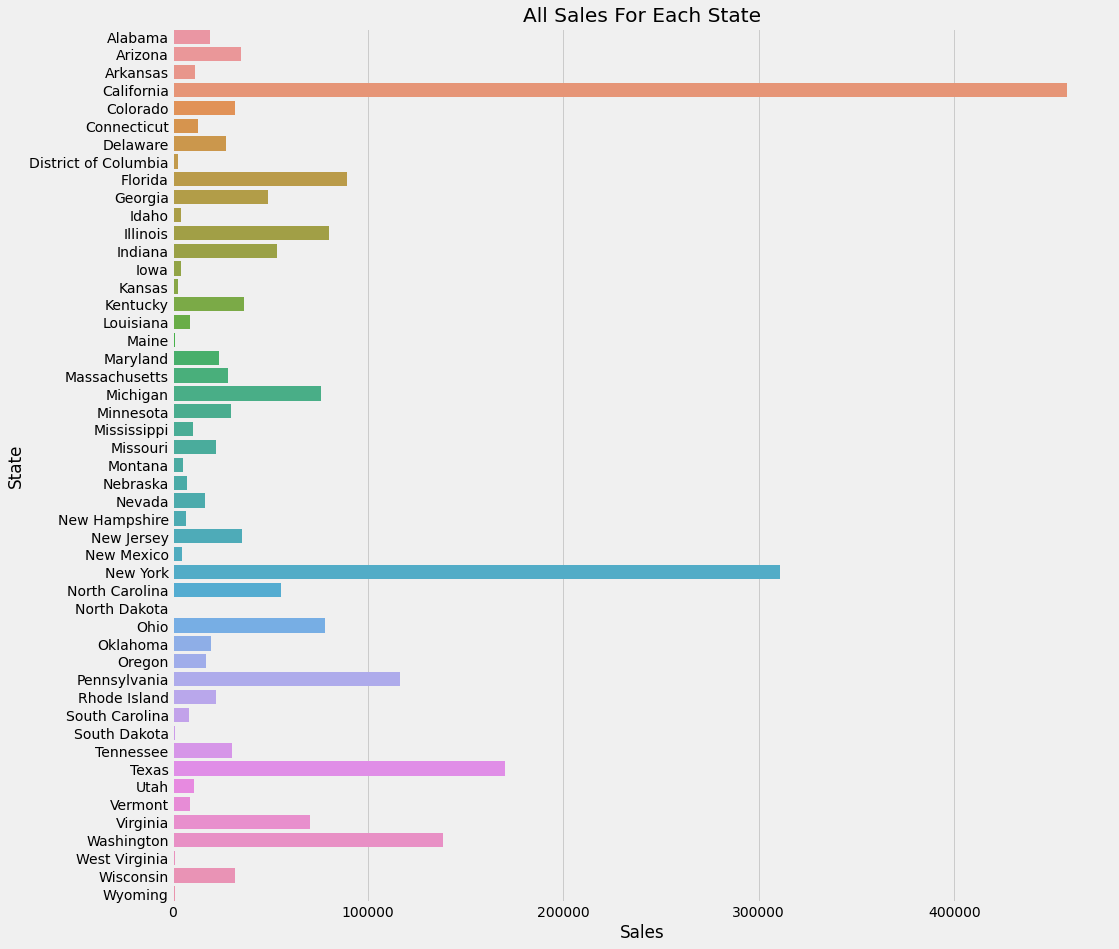

In [59]:
plt.figure(figsize=(15,15))
sns.barplot(data = SalesForState , y = "State" ,x = "Sales")
plt.title("All Sales For Each State")
plt.show()

All Profit For Each Region

In [60]:
ProfitForRegion = data.groupby(['Region'],as_index=False).sum()

In [61]:
ProfitForRegion

,Region,Postal Code,Sales,Quantity,Discount,Profit
0,Central,151786150,501239.8908,8780,558.34,39706.3625
1,East,50171698,678781.2400,10618,414.00,91522.7800
2,South,55875052,391721.9050,6209,238.55,46749.4303
3,West,293739752,725457.8245,12266,350.20,108418.4489


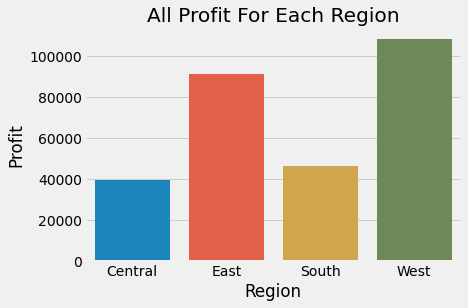

In [63]:
plt.xticks(rotation=0)
sns.barplot(data = SalesForRegion , x = "Region" ,y = "Profit")
plt.title("All Profit For Each Region")
plt.show()

All Profit For Each State

In [64]:
ProfitForState = data.groupby(['State'],as_index=False).sum()

In [65]:
ProfitForState

,State,Postal Code,Sales,Quantity,Discount,Profit
0,Alabama,2195669,19510.6400,256,0.00,5786.8253
1,Arizona,19102126,35282.0010,862,68.00,-3427.9246
2,Arkansas,4339309,11678.1300,240,0.00,4008.6871
3,California,184382639,457687.6315,7667,145.60,76381.3871
4,Colorado,14613828,32108.1180,693,57.60,-6527.8579
5,Connecticut,531005,13384.3570,281,0.60,3511.4918
6,Delaware,1896504,27451.0690,367,0.60,9977.3748
7,District of Columbia,200160,2865.0200,40,0.00,1059.5893
8,Florida,12640225,89473.7080,1379,114.65,-3399.3017
9,Georgia,5685480,49095.8400,705,0.00,16250.0433


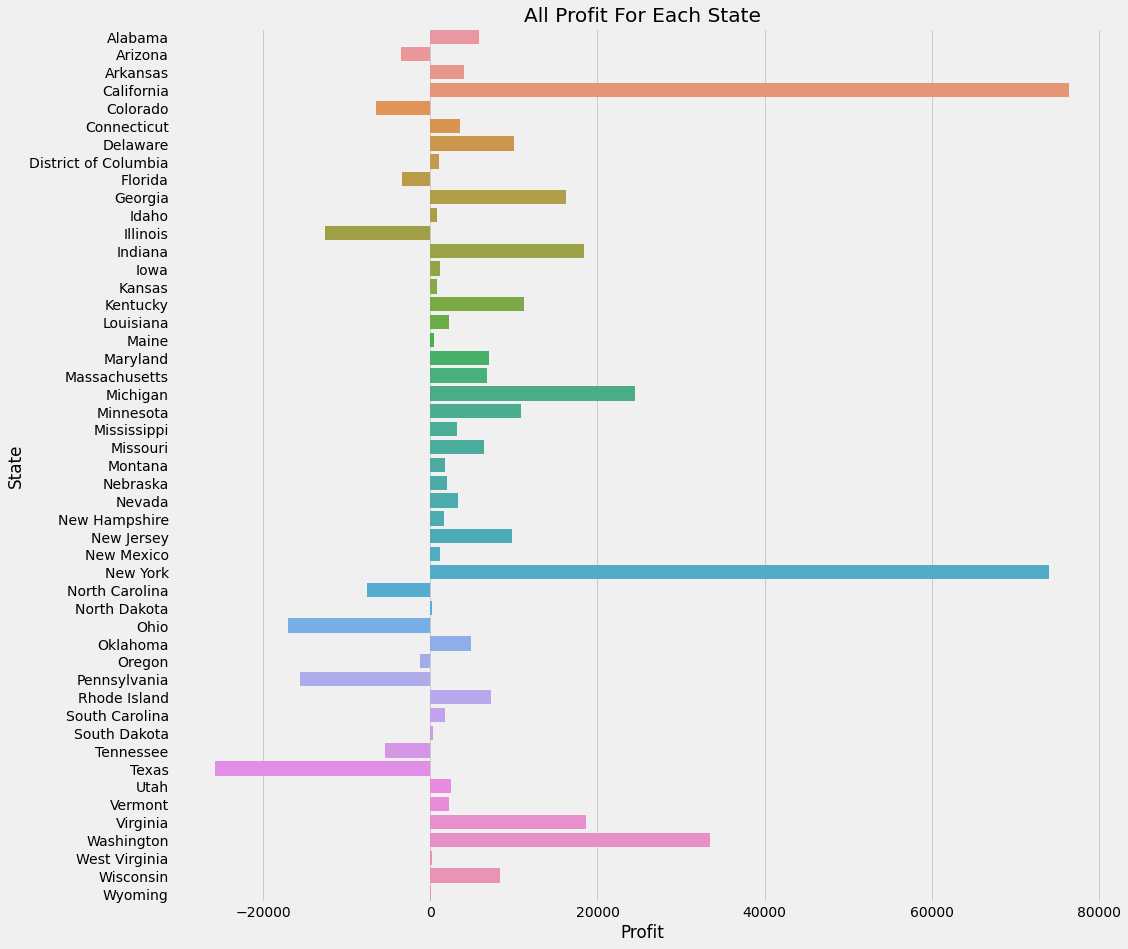

In [74]:
plt.figure(figsize=(15,15))
sns.barplot(data = ProfitForState , y = "State" ,x = "Profit")
plt.title("All Profit For Each State")
plt.show()

All Profit For each Category in each Region

In [67]:
ProfitForCategoryInRegion = data.groupby(['Region','Category'],as_index=False).sum()

In [68]:
ProfitForCategoryInRegion

,Region,Category,Postal Code,Sales,Quantity,Discount,Profit
0,Central,Furniture,31498984,163797.1638,1827,143.04,-2871.0494
1,Central,Office Supplies,92822095,167026.4150,5409,359.40,8879.9799
2,Central,Technology,27465071,170416.3120,1544,55.90,33697.4320
3,East,Furniture,10407666,208291.2040,2214,92.60,3046.1658
4,East,Office Supplies,29791451,205516.0550,6462,244.70,41014.5791
5,East,Technology,9972581,264973.9810,1942,76.70,47462.0351
6,South,Furniture,11471303,117298.6840,1291,40.35,6771.2061
7,South,Office Supplies,34072173,125651.3130,3800,166.60,19986.3928
8,South,Technology,10331576,148771.9080,1118,31.60,19991.8314
9,West,Furniture,64818073,252612.7435,2696,92.90,11504.9503


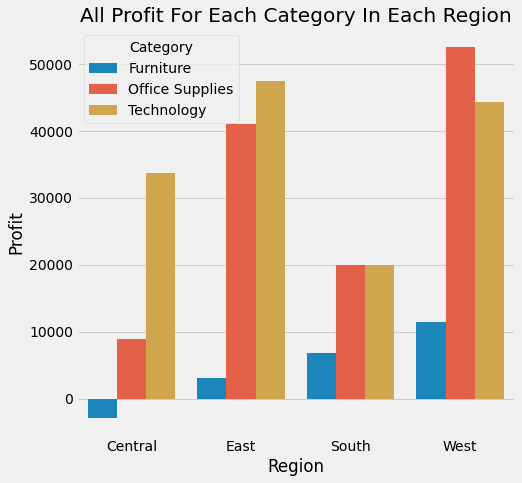

In [72]:
plt.figure(figsize=(7,7))
sns.barplot(data = ProfitForCategoryInRegion , x = "Region" ,y = "Profit",hue='Category')
plt.title("All Profit For Each Category In Each Region")
plt.show()

All Sales For each Category in each Region

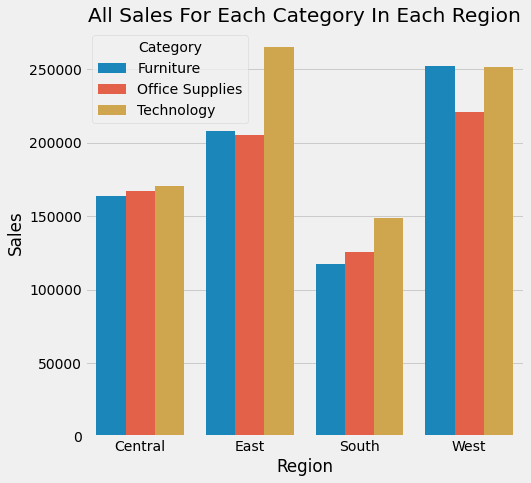

In [73]:
plt.figure(figsize=(7,7))
sns.barplot(data = ProfitForCategoryInRegion , x = "Region" ,y = "Sales",hue='Category')
plt.title("All Sales For Each Category In Each Region")
plt.show()